# **Python for Data Science Assignment 3 - Bank Marketing**

Fikri Fahreza

KS10-015


---

## **Download dataset**

In [1]:
! pip install wget
! pip install category_encoders
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6784fc22fe1e503a954975457b082f0bb2f8527090ea8de9d703da02e1139eee
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 723 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import wget
import wget

In [3]:
# Download dataset
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip")

'bank.zip'

In [4]:
# Ekstrak zip
!unzip bank-additional.zip
!unzip bank.zip

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
# Moving files
!mv "/content/bank-additional/bank-additional-full.csv" "/content"
!mv "/content/bank-additional/bank-additional.csv" "/content"
!mv "/content/bank-additional/bank-additional-names.txt" "/content"

# **Pengenalan**
Halo! Nama saya Fikri Fahreza, ini adalah tugas ketiga saya yang dipublikasi, dengan menggunakan Bank Marketing Dataset dari UCI.

Saya berharap dari tugas ini bisa menghasilkan *feedback* atau komentar tentang analisis ini.

LinkedIn: https://www.linkedin.com/in/fikri-fahreza/

---

# **1. Konteks**
Dataset ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugal. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu panggilan ke klien yang sama, untuk mengetahui apakah produk (deposito berjangka bank) akan ('ya') atau ('tidak') berlangganan. Data ini berasal dari UCI Machine Learning Repository, lebih tepatnya pada link berikut ini: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## **1.1. Atribut data**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
* Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
* Output variable (desired target):
21. y: has the client subscribed a term deposit? (binary: 'yes','no')

## **1.2. Tujuan**

Membuat model klasifikasi dengan menggunakan Bank Marketing Dataset.



---



# **2. Data Preprocessing**

Pada bagian ini, kita akan melakukan import data, transformasi, dan lain sebagainya. Tujuannya agar data sudah siap kita olah, *yummy!*

## **2.1. Import data dan library**

In [6]:
# Preprocessing tools
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [7]:
# Membaca CSV ke DataFrame
df = pd.read_csv("bank-additional-full.csv", delimiter=";")

## **2.2. Memeriksa dan bersihkan data**

Kita akan memeriksa data, jika terdapat *missing values* atau terdapat bagian tidak sesuai dengan yang kita harapkan, maka bisa langsung kita bersihkan, untuk menghindari hasil analisa yang *bias* atau *unfair*. 

*Garbage In Garbage Out!*

In [8]:
# Menampilkan 5 data teratas
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Berikut contoh data yang terdapat didalam dataset terkait.

In [9]:
# Informasi terkait tipe data, nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Bisa kita lihat bahwa tidak terdapat *missing values* dari dataset ini. Selanjutnya, kita akan membagi kolom numerik dan kategorik, tujuannya untuk memeriksa *unique values*.

In [10]:
# Subset kolom berdasarkan tipe data
categorical_col = df.select_dtypes(include="object").columns.values
numerical_col = df.select_dtypes(include=["int64", "float64"]).columns.values

print(f"Kolom kategorik: {categorical_col}")
print(f"Kolom numerik: {numerical_col}")

Kolom kategorik: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']
Kolom numerik: ['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [11]:
# Melihat unique values yang terdapat di setiap kolom (kategorikal)
for col in categorical_col:
  print(f"Unique values ({col} column): {df[col].unique()}")
  print("=" * 100)

Unique values (job column): ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values (marital column): ['married' 'single' 'divorced' 'unknown']
Unique values (education column): ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values (default column): ['no' 'unknown' 'yes']
Unique values (housing column): ['no' 'yes' 'unknown']
Unique values (loan column): ['no' 'yes' 'unknown']
Unique values (contact column): ['telephone' 'cellular']
Unique values (month column): ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values (day_of_week column): ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values (poutcome column): ['nonexistent' 'failure' 'success']
Unique values (y column): ['no' 'yes']


Untuk nilai yang terdapat di kolom kategorik ini tidak terdapat yang aneh atau janggal (untuk nilai unknown akan saya biarkan karena mungkin saja dari situ kita bisa mendapatkan insight). Juga, kita hanya akan melihat *unique values* untuk kolom bertipe data kategorik. Karena untuk kolom bertipe numerik akan lebih cocok untuk dilihat distribusinya dan diperiksa apakah terdapat outlier. Selanjutnya, kita akan melihat deskripsi dari data untuk masing-masing tipe data.

In [12]:
# Kategorik
df[categorical_col].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Untuk kolom bertipe kategorik sudah aman.

In [13]:
# Numerik
df[numerical_col].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Untuk kolom bertipe data numerik, hanya kolom pdays saja yang memiliki hal janggal. Tetapi, pada dokumentasi sudah dijelaskan, bahwa nilai 999 pada kolom pdays berarti klien tidak pernah dihubungi sebelumnya (Klien baru pertama kali dihubungi untuk *campaign* ini). Untuk nilai 999 di kolom pdays akan kita biarkan saja, dikarenakan jika kita ubah menjadi 0 akan mengubah persepsi/arti pada nilai. Selanjutnya, kita akan memeriksa kardinalitas dari tiap atribut data.

In [14]:
# Cek kardinalitas data
for col in df[categorical_col]:
  print(f"Number unique {col} column: {df[col].nunique()}")
  print("=" * 100)

Number unique job column: 12
Number unique marital column: 4
Number unique education column: 8
Number unique default column: 3
Number unique housing column: 3
Number unique loan column: 3
Number unique contact column: 2
Number unique month column: 10
Number unique day_of_week column: 5
Number unique poutcome column: 3
Number unique y column: 2


Untuk kardinalitas kita akan memeriksa untuk kolom yang bertipe data kategorik saja. Tidak ditemukan kardinalitas rendah atau tinggi disini. Artinya sudah aman.



---



# **3. Visualization**
Pada bagian ini, kita akan menjawab beberapa pertanyaan tentang data ini, sekaligus memvisualisasikannya.

**Question**
1. Berapa banyak jumlah pelanggan yang tertarik untuk deposit jangka panjang dari *campaign* ini?

no     0.887346
yes    0.112654
Name: y, dtype: float64


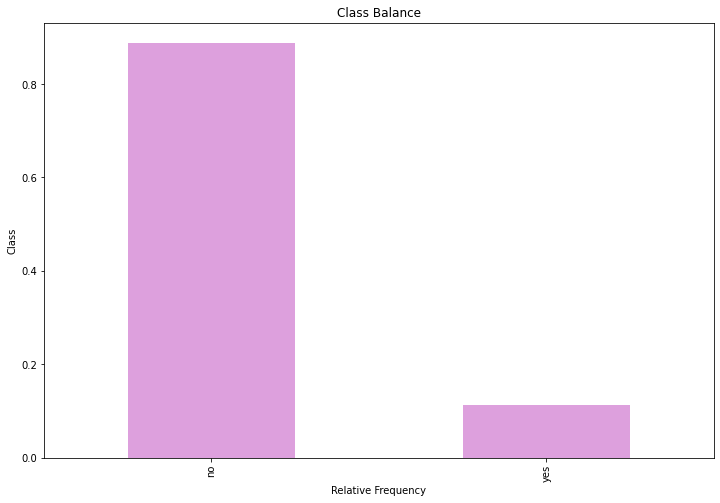

In [15]:
# Memeriksa kolom target
plt.figure(figsize=(12,8))
df["y"].value_counts(normalize=True).plot(kind="bar", color="plum")
plt.title("Class Balance")
plt.xlabel("Relative Frequency")
plt.ylabel("Class");
print(df["y"].value_counts(normalize=True))

Terdapat 88.73% pelanggan yang memilih no (tidak tertarik deposit) pada *campaign* kali ini, dan terdapat 11.27% memilih yes (tertarik deposit). Dapat dilihat juga bahwa kita mempunyai data yang *imbalanced* atau tidak seimbang. Pada bagian-bagian selanjutnya kita akan melakukan *resampling* untuk menangani *imbalanced data*.

2. Pekerjaan apa saja dari pelanggan yang mendapatkan tawaran untuk deposit jangka panjang?

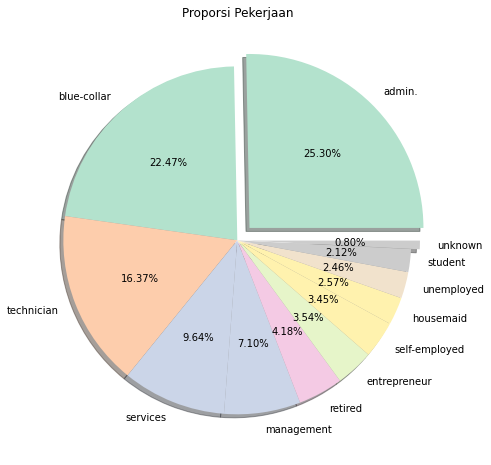

In [16]:
# Melihat proporsi atribut job
plt.figure(figsize=(12,8))
df["job"].value_counts().plot(kind="pie", 
                              cmap="Pastel2", 
                              autopct="%.2f%%", 
                              shadow=True,
                              explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05])
plt.title("Proporsi Pekerjaan")
plt.ylabel(None);

Dapat dilihat bahwa **admin** merupakan pekerjaan yang paling sering mendapatkan tawaran mengenai deposito jangka panjang dengan proporsi sebesar 25.30% dan **student** merupakan yang paling terendah dengan proporsi sebesar 2.12%. Adapun, sebesar 0.80% tidak diketahui apa pekerjaannya.

# **4. Preparation**
Pada bagian ini, kita akan melakukan *splitting data* dan *feature*, *resampling* dan tentu saja melakukan pemodelan.

Berikut model Machine Learning yang akan kita implementasikan untuk data ini:
*  Logistic Regression
*  K-Nearest Neighbors (KNN)
*  Support Vector Machine (SVM)
*  Decision Tree
*  Random Forest
*  Naive Bayes

Selanjutnya, kita akan membagi data terlebih untuk sebagai feature dan target

In [17]:
target = "y"
X = df.drop(target, axis=1)
y = df[target]

Data sudah terbagi, dengan feature di variabel X dan target di variabel y. Selanjutnya, kita akan membagi data train dan test

In [18]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32950, 20)
y_train shape: (32950,)
X_test shape: (8238, 20)
y_test shape: (8238,)


Dapat dilihat diatas ini untuk shape data train dan test.

In [19]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

Kita melakukan *over_sampling* dikarenakan, jika menggunakan *under-sampling* data akan tersisa sangat sedikit sekali pada kasus ini.

---

# **5. Logistic Regression**
Kita akan mengimplementasikan Logistic Regression yang di-*import* dari library scikit-learn.

In [20]:
# Menginisialisasi model
lr = make_pipeline(OneHotEncoder(use_cat_names=True),
                   StandardScaler(),
                   LogisticRegression(max_iter=1000))
# Melatih model
lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['job', 'marital', 'education', 'default',
                                     'housing', 'loan', 'contact', 'month',
                                     'day_of_week', 'poutcome'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
y_pred_lr = lr.predict(X_test)

0.9115076474872542
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



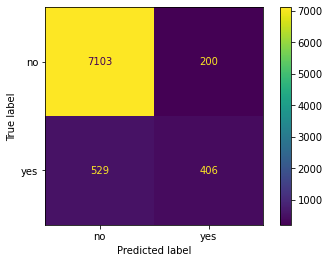

In [22]:
print(accuracy_score(y_pred_lr, y_test))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
print(classification_report(y_test, y_pred_lr))

Confusion Matrix diatas menunjukan hasil berikut: 
* 7103 True Negative (TN)
* 200 False Positive (FP)
* 529 False Negative (FN)
* 406 True Positive (TP)

Pada bagian ini kita menggunakan data train original (tidak menggunakan data resampling). Karena setelah dilakukan percobaan, untuk akurasi masih lebih baik menggunakan data original pada model ini.

Didapatkan akurasi sebesar 91.2% (0.9115076474872542) pada model Logistic Regression. Tetapi, jika ingin mendapatkan balance pada model, maka data yang telah di *over-sampling* akan lebih baik, walaupun mendapatkan akurasi yang lebih rendah.



---



# **6. K-Nearest Neighbors (KNN)**
Kita akan mengimplementasikan K-Nearest Neighbors yang di-*import* dari library scikit-learn.

In [23]:
# Menginisialisasi model
knn = make_pipeline(OneHotEncoder(use_cat_names=True),
                   StandardScaler(),
                   KNeighborsClassifier())
# Melatih model
knn.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['job', 'marital', 'education', 'default',
                                     'housing', 'loan', 'contact', 'month',
                                     'day_of_week', 'poutcome'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [24]:
y_pred_knn = knn.predict(X_test)

0.898154891964069
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7303
         yes       0.60      0.32      0.42       935

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.68      8238
weighted avg       0.88      0.90      0.88      8238



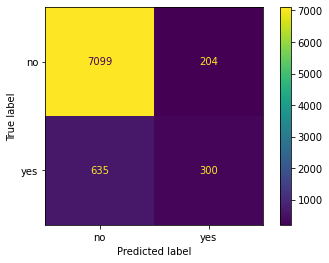

In [25]:
print(accuracy_score(y_pred_knn, y_test))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
print(classification_report(y_test, y_pred_knn))

Confusion Matrix diatas menunjukan hasil berikut: 
* 7099 True Negative (TN)
* 204 False Positive (FP)
* 635 False Negative (FN)
* 300 True Positive (TP)

Pada bagian ini, saya menggunakan default model dari K-Nearest Neighbors dan tidak melakukan hyperparamater tuning.

Didapatkan akurasi sebesar 90.0% (0.898154891964069) pada model K-Nearest Neighbors.



---



# **7. Support Vector Machine (SVM)**
Kita akan mengimplementasikan Support Vector Machine yang di-*import* dari library scikit-learn.

In [26]:
# Menginisialisasi model
svm = make_pipeline(OneHotEncoder(use_cat_names=True),
                   StandardScaler(),
                   SVC())
# Melatih model
svm.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['job', 'marital', 'education', 'default',
                                     'housing', 'loan', 'contact', 'month',
                                     'day_of_week', 'poutcome'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

In [27]:
y_pred_svm = svm.predict(X_test)

0.9090798737557659
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



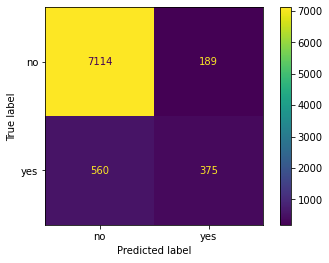

In [28]:
print(accuracy_score(y_pred_svm, y_test))
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
print(classification_report(y_test, y_pred_svm))

Confusion Matrix diatas menunjukan hasil berikut: 
* 7114 True Negative (TN)
* 189 False Positive (FP)
* 560 False Negative (FN)
* 375 True Positive (TP)

Pada bagian ini, saya menggunakan default model dari Support Vector Machine dan tidak melakukan hyperparamater tuning.

Didapatkan akurasi sebesar 91.0% (0.9090798737557659) pada model Support Vector Machine.



---



# **8. Decision Tree**
Kita akan mengimplementasikan Decision Tree yang di-*import* dari library scikit-learn.

In [29]:
# Menginisialisasi model
dt = make_pipeline(OrdinalEncoder(),
                   DecisionTreeClassifier(random_state=42))
# Melatih model
dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'day_of_week', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': blue-collar       1
admin.            2
retired           3
housemaid         4
management        5
technician        6
entrepreneur      7
services          8
student           9
unemployed       10
self-employed    11
unknown          12
NaN              -2
dtype: int64...
                                          'data_type': dtype('O'),
                                          'mapping': jul     1
may     2
apr     3
nov     4
jun     5
mar     6
aug     7
sep     8
oct     9
dec    10
NaN    -2
dtype: int64},
                                         {'col': 'day_of_week',
                       

In [30]:
y_pred_dt = dt.predict(X_test)

0.8846807477543093
              precision    recall  f1-score   support

          no       0.93      0.94      0.93      7303
         yes       0.49      0.49      0.49       935

    accuracy                           0.88      8238
   macro avg       0.71      0.71      0.71      8238
weighted avg       0.88      0.88      0.88      8238



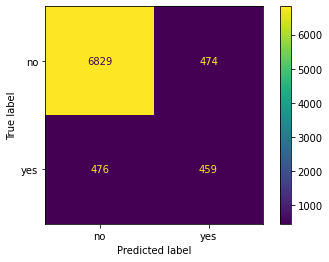

In [31]:
print(accuracy_score(y_pred_dt, y_test))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
print(classification_report(y_test, y_pred_dt))

Confusion Matrix diatas menunjukan hasil berikut: 
* 6829 True Negative (TN)
* 474 False Positive (FP)
* 476 False Negative (FN)
* 459 True Positive (TP)

Pada bagian ini, saya menggunakan default model dari Decision Tree dan tidak melakukan hyperparamater tuning.

Didapatkan akurasi sebesar 88.5% (0.8846807477543093) pada model Decision Tree.



---



# **9. Random Forest**
Kita akan mengimplementasikan Random Forest yang di-*import* dari library scikit-learn.

In [32]:
# Menginisialisasi model
rf = make_pipeline(OrdinalEncoder(),
                   RandomForestClassifier(random_state=42))
# Melatih model
rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'day_of_week', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': blue-collar       1
admin.            2
retired           3
housemaid         4
management        5
technician        6
entrepreneur      7
services          8
student           9
unemployed       10
self-employed    11
unknown          12
NaN              -2
dtype: int64...
                                          'data_type': dtype('O'),
                                          'mapping': jul     1
may     2
apr     3
nov     4
jun     5
mar     6
aug     7
sep     8
oct     9
dec    10
NaN    -2
dtype: int64},
                                         {'col': 'day_of_week',
                       

In [33]:
y_pred_rf = rf.predict(X_test)

0.9146637533381888
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.66      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



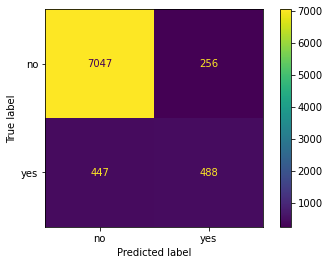

In [34]:
print(accuracy_score(y_pred_rf, y_test))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
print(classification_report(y_test, y_pred_rf))

Confusion Matrix diatas menunjukan hasil berikut: 
* 7047 True Negative (TN)
* 256 False Positive (FP)
* 447 False Negative (FN)
* 488 True Positive (TP)

Pada bagian ini, saya menggunakan default model dari Random Forest dan tidak melakukan hyperparamater tuning.

Didapatkan akurasi sebesar 91.5% (0.9146637533381888) pada model Random Forest.



---



# **10. Naive Bayes**
Kita akan mengimplementasikan Naive Bayes yang di-*import* dari library scikit-learn.

In [35]:
# Menginisialisasi model
nb = make_pipeline(OrdinalEncoder(),
                   GaussianNB())
# Melatih model
nb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'day_of_week', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': blue-collar       1
admin.            2
retired           3
housemaid         4
management        5
technician        6
entrepreneur      7
services          8
student           9
unemployed       10
self-employed    11
unknown          12
NaN              -2
dtype: int64...
cellular     2
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': jul     1
may     2
apr     3
nov     4
jun     5
mar     6
aug     7
sep     8
oct     9
dec    10
NaN    -2

In [36]:
y_pred_nb = nb.predict(X_test)

0.8491138625880068
              precision    recall  f1-score   support

          no       0.94      0.88      0.91      7303
         yes       0.39      0.58      0.46       935

    accuracy                           0.85      8238
   macro avg       0.67      0.73      0.69      8238
weighted avg       0.88      0.85      0.86      8238



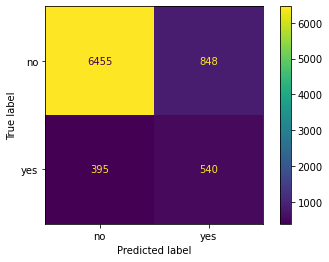

In [37]:
print(accuracy_score(y_pred_nb, y_test))
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
print(classification_report(y_test, y_pred_nb))

Confusion Matrix diatas menunjukan hasil berikut: 
* 6455 True Negative (TN)
* 848 False Positive (FP)
* 395 False Negative (FN)
* 540 True Positive (TP)

Pada bagian ini, saya menggunakan default model dari Naive Bayes dan tidak melakukan hyperparamater tuning.

Didapatkan akurasi sebesar 85.0% (0.8491138625880068) pada model Random Forest.



---



# **11. Kesimpulan**
Tibalah kita pada akhir dari *notebook* ini. Berikut kesimpulan terkait beberapa *model* yang telah dicoba untuk melakukan klasifikasi dengan memakai Bank Marketing Dataset. 

Catatan: Dari semua *model* ini dilatih secara *default* atau tidak ada *hyperparameter tuning* pada semua *model* yang telah dicoba.

In [38]:
print(f"Logistic Regression: {accuracy_score(y_pred_lr, y_test)}")
print(f"K-Nearest Neighbors: {accuracy_score(y_pred_knn, y_test)}")
print(f"Support Vector Machine: {accuracy_score(y_pred_svm, y_test)}")
print(f"Decision Tree: {accuracy_score(y_pred_dt, y_test)}")
print(f"Random Forest: {accuracy_score(y_pred_rf, y_test)}")
print(f"Naive Bayes: {accuracy_score(y_pred_nb, y_test)}")

Logistic Regression: 0.9115076474872542
K-Nearest Neighbors: 0.898154891964069
Support Vector Machine: 0.9090798737557659
Decision Tree: 0.8846807477543093
Random Forest: 0.9146637533381888
Naive Bayes: 0.8491138625880068


**Model dengan akurasi tertinggi**

Dapat disimpulkan, **Random Forest** merupakan model dengan akurasi tertinggi untuk data ini. Mencatatkan akurasi dengan nilai 91.5%. Sangat berbeda tipis dengan model **Logistic Regression** yang mencatatkan akurasi sebesar 91.2%.

**Model dengan akurasi terendah**

Sedangkan, untuk model dengan akurasi terendah adalah **Naive Bayes**, yang merupakan model paling sederhana dari yang lainnya. Mencatatkan nilai 85.0%, yang bukan merupakan perbedaan signifikan dari model lainnya.

Tetapi, dari semua ini masih banyak sekali kurangnya, karena dibutuhkan analisis dan pemodelan yang lebih lanjut lagi untuk menemukan insight menarik lainnya.

---
Sekian dari saya terima kasih!

Salam hormat,

Fikri Fahreza